Ashlee A 2/26/23

launch matplotlib

In [2]:
%matplotlib inline

create a lambda for the preceding formula and  use it to calculate the Celsius equivalents of the Fahrenheit temperatures 0–100 in 10-  degree increments.

In [3]:
c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

import pandas

In [4]:
import pandas as pd

Next, let’s place the data in a DataFrame, then use its plot method to display the linear relationship between the Fahrenheit and Celsius temperatures.

In [5]:
temps_df = pd.DataFrame(temps, columns = ['Fahrenheit', 'Celsius'])

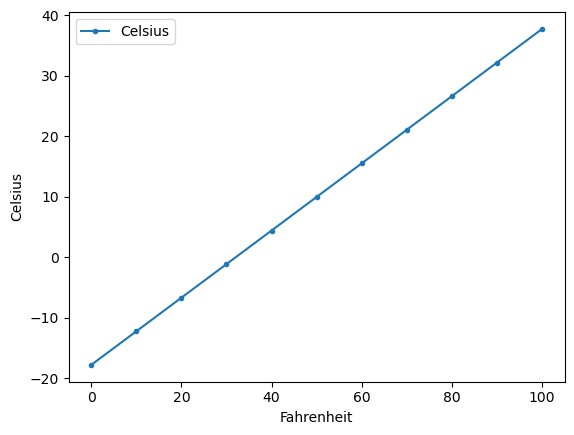

In [6]:
axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style = '.-')
y_label = axes.set_ylabel('Celsius')

import CSV file

In [74]:
nyc = pd.read_csv('C:/Users/Teacher/Downloads/g/1895-2018.csv', index_col=0)

Show head and tail to get more info about our data set 

In [75]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [76]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


rename value column as Temperature and view head of file to check

In [77]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [78]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Check column data type

In [79]:
nyc.Date.dtype

dtype('int64')

divide by 100 to remove the january part out of that date (since all of them were january)

In [80]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


do some stats on the data set.

In [81]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

import stats from scipy

In [82]:
from scipy import stats

find the linear regression equation 

In [83]:
linear_regression = stats.linregress(x = nyc.Date, y = nyc.Temperature)

In [84]:
slope = linear_regression.slope

In [86]:
intercept = linear_regression.intercept

Use linear regression to predict the temperature

In [109]:
slope * 2026 + intercept 

38.62177088906374

In [108]:
slope * 1890 + intercept

36.612865774980335

import seaborn to create visualizations 

In [90]:
import seaborn as sns

(10.0, 70.0)

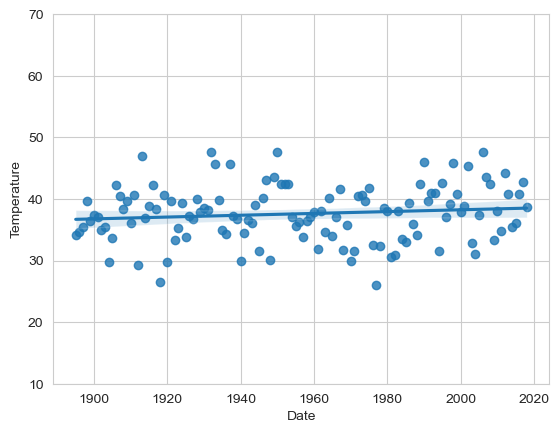

In [91]:
sns.set_style('whitegrid')
axes = sns.regplot(x = nyc.Date, y = nyc.Temperature)
axes.set_ylim(10, 70)

Now we will do the same thing but using multiple regression 

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state = 11)

In [94]:
X_train.shape

(93, 1)

In [95]:
X_test.shape

(31, 1)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
linear_regression2 = LinearRegression()

In [98]:
linear_regression2.fit(X = X_train, y = y_train)

LinearRegression()

In [99]:
slope2 = linear_regression2.coef_
slope2

array([0.01939167])

In [100]:
intercept2 = linear_regression2.intercept_
intercept2

-0.30779820252656265

In [101]:
predicted = linear_regression2.predict(X_test)

In [102]:
expected = y_test

In [103]:
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p: .2f}, expected: {e: .2f}')

predicted:  37.86, expected:  31.70
predicted:  38.69, expected:  34.80
predicted:  37.00, expected:  39.40
predicted:  37.25, expected:  45.70
predicted:  38.05, expected:  32.30
predicted:  37.64, expected:  33.80
predicted:  36.94, expected:  39.70


In [104]:
predict = (lambda x: slope2 * x + intercept2)
predict(2019)

array([38.84399018])

In [105]:
predict(1890)

array([36.34246432])

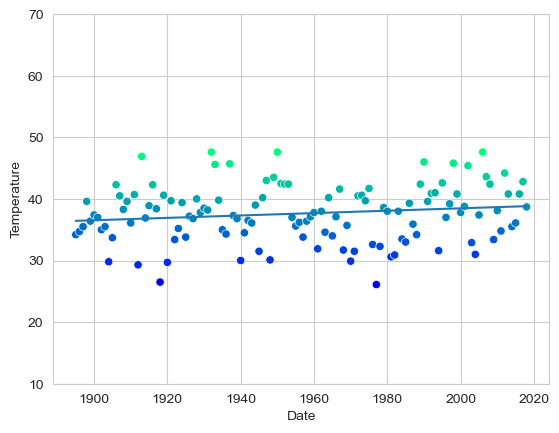

In [106]:

axes2 = sns.scatterplot(data = nyc, x = 'Date', y = 'Temperature', hue = 'Temperature', palette = 'winter', legend = False)
axes2.set_ylim(10, 70)
import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x, y)

Both methods are very useful and are very similar. If I had to say one was better I would say multiple regression is the more accurate way of doing it. I also like how on the multiple regression it is color coded making your visualization even more compelling